<a href="https://www.kaggle.com/code/tamalkoley/relative-strength-index-rsi-calculation-and-plot?scriptVersionId=156058600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290465 sha256=a4f0b3d242ab0a1b31dc01e7c9e677c1c8e8ae58c6187a949df6c89c07ad82a5
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Fetch historical stock data for SBIN
data = yf.download("SBIN.BO", start ="2023-11.01", end ="2023-11-30")


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


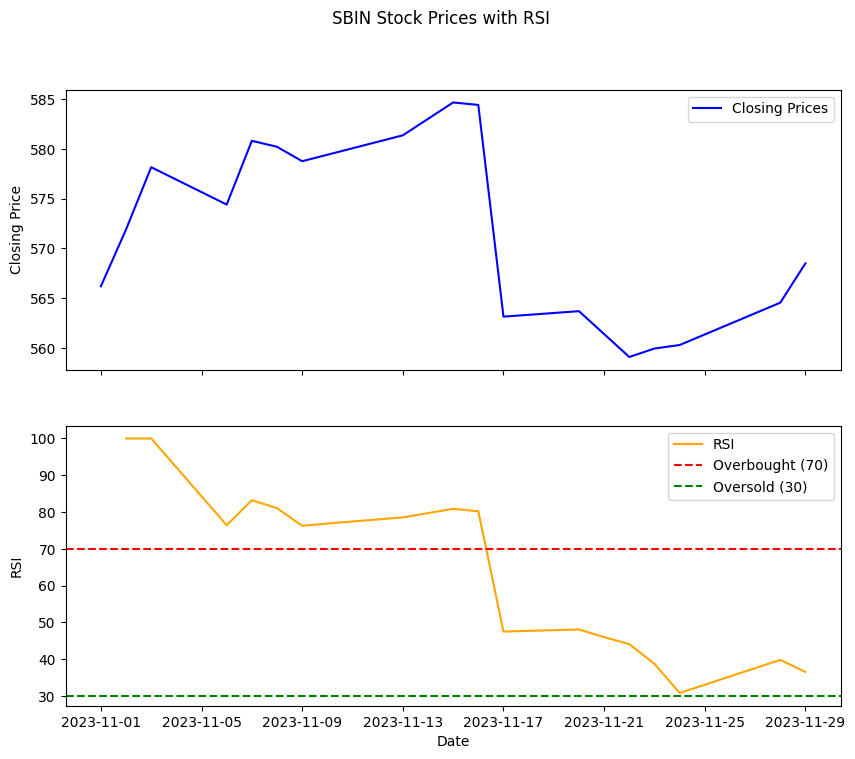

In [6]:
# Fetch historical stock data for SBIN
data = yf.download("SBIN.BO", start="2023-11-01", end="2023-11-30")

# Calculate the 14-day Relative Strength Index (RSI)
def calculate_rsi(data, column='Close', window=14):
    daily_returns = data[column].pct_change()
    gain = daily_returns.where(daily_returns > 0, 0)
    loss = -daily_returns.where(daily_returns < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

data['RSI'] = calculate_rsi(data)

# Plot the closing prices and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting Closing Prices
ax1.plot(data['Close'], label='Closing Prices', color='blue')
ax1.set_ylabel('Closing Price')
ax1.legend()

# Plotting RSI
ax2.plot(data['RSI'], label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.suptitle('SBIN Stock Prices with RSI')
plt.show()
